<a href="https://colab.research.google.com/github/electrojam/Curso-de-Matematicas-para-Data-Science_Probabilidad/blob/main/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

## MLE como base para la regresión logística

> Bloc con sangría



 Consideramos el problema de MLE:

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli:

$$
P = \begin{cases}
p,
& \mbox{si $y=1$,}\\
1-p, & \mbox{si $y=0$.}
\end{cases}
$$

En este caso la verosimilitud está dada por:

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

In [9]:
def likelihood(y, yp): #yp resutado de modelo, y valor real de la categoría
  return yp*y+(1-yp)*(1-y)

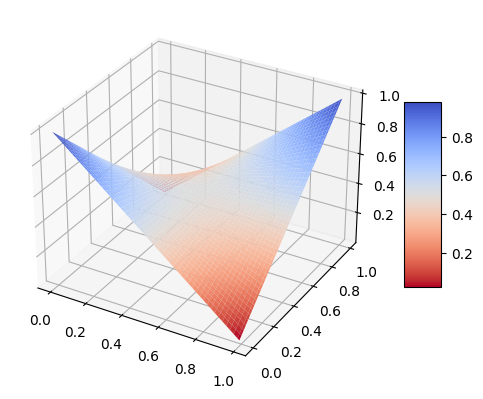

In [14]:
fig = plt.figure()
axes = plt.axes(projection='3d')

Y = np.arange(0,1,0.01)
YP = np.arange(0,1,0.01)
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

surf = axes.plot_surface(Y, YP, Z, cmap=cm.coolwarm_r)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [12]:
Y

array([[0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       ...,
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
       [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99]])

In [13]:
YP

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.97, 0.97, 0.97, ..., 0.97, 0.97, 0.97],
       [0.98, 0.98, 0.98, ..., 0.98, 0.98, 0.98],
       [0.99, 0.99, 0.99, ..., 0.99, 0.99, 0.99]])

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [16]:
atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X, y = load_iris(return_X_y=True)

In [17]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
clf = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100], y[:100])

In [22]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])